In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from neurodsp.spectral import compute_spectrum
from neurodsp.plts.spectral import plot_power_spectra
from mne.viz import plot_topomap
from matplotlib import cm, colors
from sklearn.model_selection       import GridSearchCV
from sklearn.pipeline              import Pipeline
from sklearn.preprocessing         import StandardScaler, QuantileTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from sklearn                       import preprocessing, decomposition, svm
from sklearn.model_selection       import KFold, cross_val_score, cross_validate
from sklearn.metrics               import f1_score, precision_score, recall_score, accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from scipy.stats import mannwhitneyu

#

# Loading
#

powers_all = []

for x in range(1,89):
    if (x<10):
        input_file_address_processed = '/Users/alizahasan/addata/derivatives/sub-00' + str(x) + '/eeg/sub-00' + str(x) + '_task-eyesclosed_eeg.set'
    else: 
        input_file_address_processed = '/Users/alizahasan/addata/derivatives/sub-0' + str(x) + '/eeg/sub-0' + str(x) + '_task-eyesclosed_eeg.set'
    
    raw_subj_data_filt = mne.io.read_raw_eeglab(input_file_address_processed)
    data_subj_filt = raw_subj_data_filt.get_data()
    time_window = 2 #6
    freqs, powers = compute_spectrum(data_subj_filt, raw_subj_data_filt.info['sfreq'], method='welch', avg_type='median', nperseg=raw_subj_data_filt.info['sfreq']*time_window)
    sum =  powers[:, (np.where(freqs==0.5)[0][0]): np.where(freqs==45)[0][0]].sum(axis=1)
    #Delta - index 0
    delta = powers[:, (np.where(freqs==0.5)[0][0]): np.where(freqs==4)[0][0]].mean(axis=1)
    
    #Theta - index 1
    theta = powers[:, (np.where(freqs==4)[0][0]): np.where(freqs==8)[0][0]].mean(axis=1)
    
    #Alpha - index 2
    alpha = powers[:, (np.where(freqs==8)[0][0]): np.where(freqs==13)[0][0]].mean(axis=1)
   
    #Beta - index 3
    beta = powers[:, (np.where(freqs==13)[0][0]): np.where(freqs==25)[0][0]].mean(axis=1)
    
    #Gamma - index 4
    gamma = powers[:, (np.where(freqs==25)[0][0]): np.where(freqs==45)[0][0]].mean(axis=1)
    
    
    #alpha/theta
    alpha_theta = alpha/theta
    
   #beta/theta
    beta_theta = beta/theta
    
    
    delta_psd = delta/sum
    theta_psd = theta/sum
    alpha_psd = alpha/sum
    beta_psd = beta/sum
    gamma_psd = gamma/sum 
    alpha_theta_psd = alpha_theta/sum
    beta_theta_psd = beta_theta/sum

    subj_psd_list = []
    subj_psd_list.extend(delta_psd)
    subj_psd_list.extend(theta_psd)
    subj_psd_list.extend(alpha_psd)
    subj_psd_list.extend(beta_psd)
    subj_psd_list.extend(gamma_psd)
    subj_psd_list.extend(alpha_theta_psd)
    subj_psd_list.extend(beta_theta_psd)
    powers_all.append(subj_psd_list)

Powers_All = np.array(powers_all)
#make it 88 x 95

/tmp/ipykernel_41782/1259889529.py:30: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw_subj_data_filt = mne.io.read_raw_eeglab(input_file_address_processed)
/tmp/ipykernel_41782/1259889529.py:30: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw_subj_data_filt = mne.io.read_raw_eeglab(input_file_address_processed)
/tmp/ipykernel_41782/1259889529.py:30: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw_subj_data_filt = mne.io.read_raw_eeglab(input_file_address_processed)
/tmp/ipykernel_41782/1259889529.py:30: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_subj_data_filt = mne.io.read_raw_eeglab(input_file_address_processed)

Average Calculation

In [159]:

ad_avg_delta = Powers_All[:36, :19].mean(axis = 0)
cn_avg_delta = Powers_All[36:65, :19].mean(axis = 0)
ftd_avg_delta = Powers_All[65:, :19].mean(axis = 0)


ad_avg_theta = Powers_All[:36, 19:38].mean(axis = 0)
cn_avg_theta = Powers_All[36:65, 19:38].mean(axis = 0)
ftd_avg_theta = Powers_All[65:, 19:38].mean(axis = 0)


ad_avg_alpha = Powers_All[:36, 38:57].mean(axis = 0)
cn_avg_alpha = Powers_All[36:65, 38:57].mean(axis = 0)
ftd_avg_alpha = Powers_All[65:, 38:57].mean(axis = 0)


ad_avg_beta = Powers_All[:36, 57:76].mean(axis = 0)
cn_avg_beta = Powers_All[36:65, 57:76].mean(axis = 0)
ftd_avg_beta = Powers_All[65:, 57:76].mean(axis = 0)


ad_avg_gamma = Powers_All[:36, 76:95].mean(axis = 0)
cn_avg_gamma = Powers_All[36:65, 76:95].mean(axis = 0)
ftd_avg_gamma = Powers_All[65:, 76:95].mean(axis = 0)

ad_avg_alpha_theta = Powers_All[:36, 95:114].mean(axis = 0)
cn_avg_alpha_theta = Powers_All[36:65, 95:114].mean(axis = 0)
ftd_avg_alpha_theta = Powers_All[65:, 95:114].mean(axis = 0)

ad_avg_beta_theta = Powers_All[:36, 114:133].mean(axis = 0)
cn_avg_beta_theta = Powers_All[36:65, 114:133].mean(axis = 0)
ftd_avg_beta_theta = Powers_All[65:, 114:133].mean(axis = 0)


In [ ]:
Histograms


(array([2., 5., 2., 2., 2., 2., 0., 1., 1., 2.]),
 array([17.94849914, 18.01207745, 18.07565575, 18.13923406, 18.20281236,
        18.26639067, 18.32996897, 18.39354728, 18.45712558, 18.52070389,
        18.58428219]),
 <BarContainer object of 10 artists>)

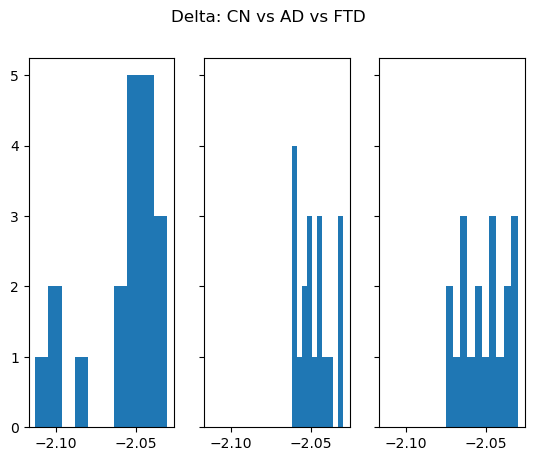

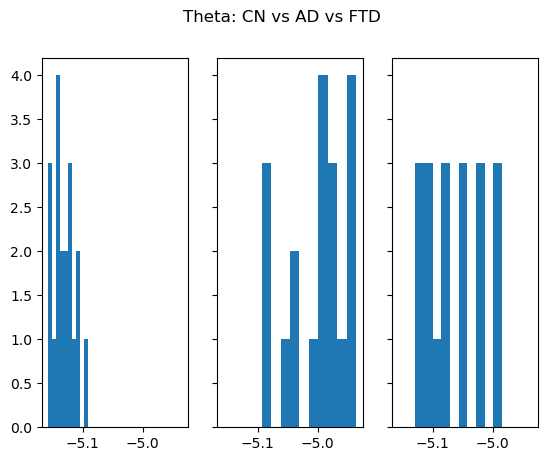

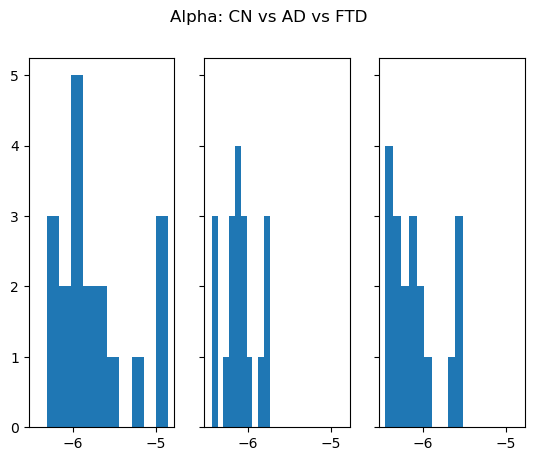

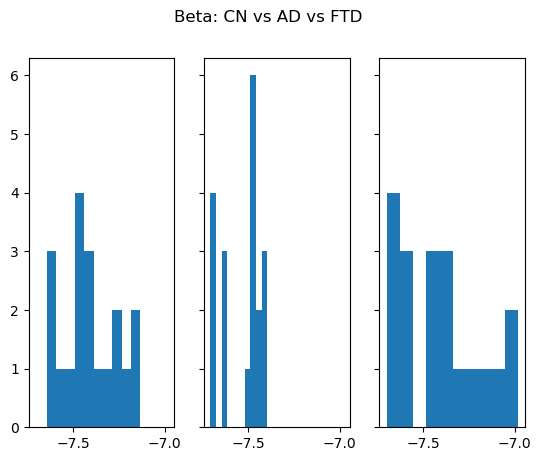

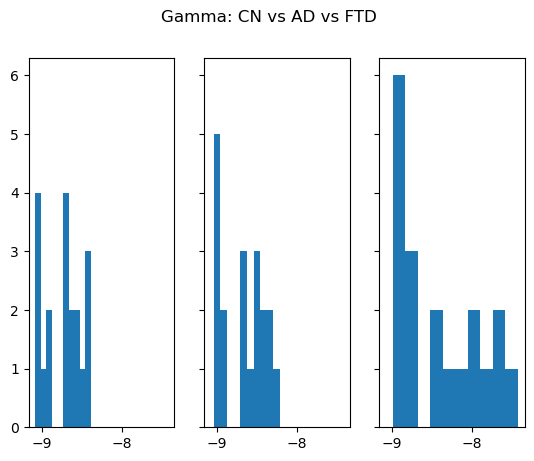

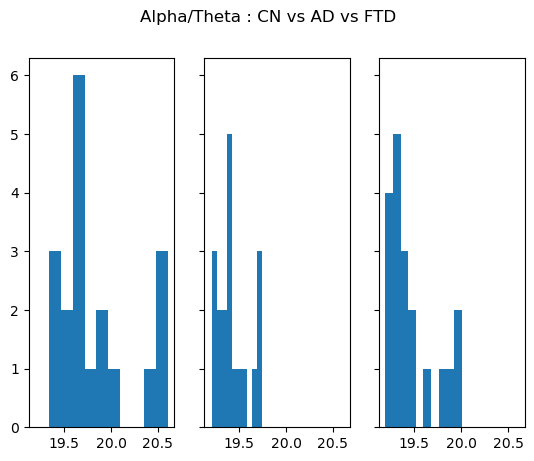

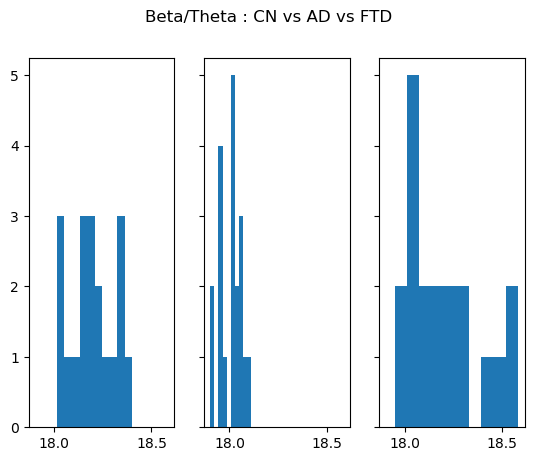

In [147]:
#Delta plot


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Delta: CN vs AD vs FTD' )
ax1.hist(np.log(cn_avg_delta))
ax2.hist(np.log(ad_avg_delta))
ax3.hist(np.log(ftd_avg_delta))

#Theta plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Theta: CN vs AD vs FTD')
ax1.hist(np.log(cn_avg_theta))
ax2.hist(np.log(ad_avg_theta))
ax3.hist(np.log(ftd_avg_theta))


#Alpha plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Alpha: CN vs AD vs FTD')
ax1.hist(np.log(cn_avg_alpha))
ax2.hist(np.log(ad_avg_alpha))
ax3.hist(np.log(ftd_avg_alpha))


#Beta plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Beta: CN vs AD vs FTD')
ax1.hist(np.log(cn_avg_beta))
ax2.hist(np.log(ad_avg_beta))
ax3.hist(np.log(ftd_avg_beta))



#Gamma plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Gamma: CN vs AD vs FTD')
ax1.hist(np.log(cn_avg_gamma))
ax2.hist(np.log(ad_avg_gamma))
ax3.hist(np.log(ftd_avg_gamma))



#Alpha/Theta plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Alpha/Theta : CN vs AD vs FTD')
ax1.hist(np.log(cn_avg_alpha_theta))
ax2.hist(np.log(ad_avg_alpha_theta))
ax3.hist(np.log(ftd_avg_alpha_theta))

#Beta/Theta plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Beta/Theta : CN vs AD vs FTD')
ax1.hist(np.log(cn_avg_beta_theta))
ax2.hist(np.log(ad_avg_beta_theta))
ax3.hist(np.log(ftd_avg_beta_theta))


In [ ]:
Mattwhitneyu Calcs

In [151]:
delta_stat, delta_p = mannwhitneyu(Powers_All[0:36, :19], Powers_All[36:65, :19])
theta_stat, theta_p = mannwhitneyu(Powers_All[0:36, 19:38], Powers_All[36:65, 19:38])
alpha_stat, alpha_p = mannwhitneyu(Powers_All[0:36, 38:57], Powers_All[36:65, 38:57])
beta_stat, beta_p = mannwhitneyu(Powers_All[0:36, 57:76], Powers_All[36:65, 57:76])
gamma_stat, gamma_p = mannwhitneyu(Powers_All[0:36, 76:95], Powers_All[36:65, 76:95])
alpha_theta_stat, alpha_theta_p = mannwhitneyu(Powers_All[0:36, 95:114], Powers_All[36:65, 95:114])
beta_theta_stat, beta_theta_p = mannwhitneyu(Powers_All[0:36, 114:133], Powers_All[36:65, 114:133])

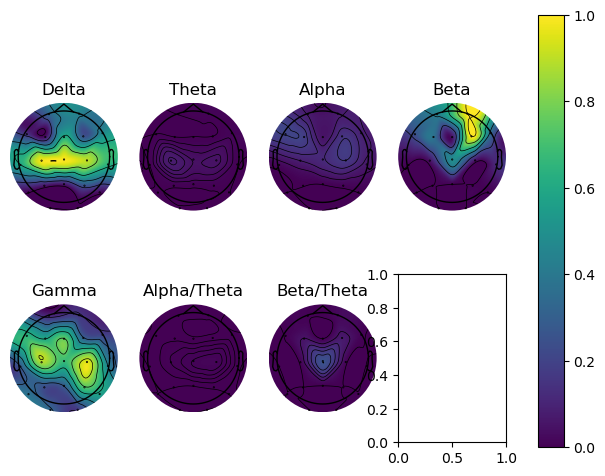

In [257]:
from matplotlib import cm, colors
import matplotlib.pyplot as plt  # Need to import plt for creating subplots

vlim=[0,1]
fig, axs = plt.subplots(nrows = 2, ncols=4)
i=0
p_vals = [delta_p, theta_p, alpha_p, beta_p, gamma_p, alpha_theta_p, beta_theta_p]
band_names = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Alpha/Theta', 'Beta/Theta']
x=0
for i in range(2):
    for j in range(4):
        if (x<7):
            im, cm  = mne.viz.plot_topomap(p_vals[x], raw_subj_data_filt.info, axes=axs[i][j],show=False,vlim=vlim,cmap='viridis')
            axs[i][j].set_title(band_names[x])
        x+=1
# manually fiddle the position of colorbar
ax_x_start = 0.95
ax_x_width = 0.04
ax_y_start = 0.1
ax_y_height = 0.9
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=colors.Normalize(vmin=vlim[0], vmax=vlim[1]))
clb = fig.colorbar(sm, cax=cbar_ax, cmap='viridis')
plt.show()

fig.savefig('p_value')



In [ ]:
The rest of the topomaps

/tmp/ipykernel_14661/4125334341.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


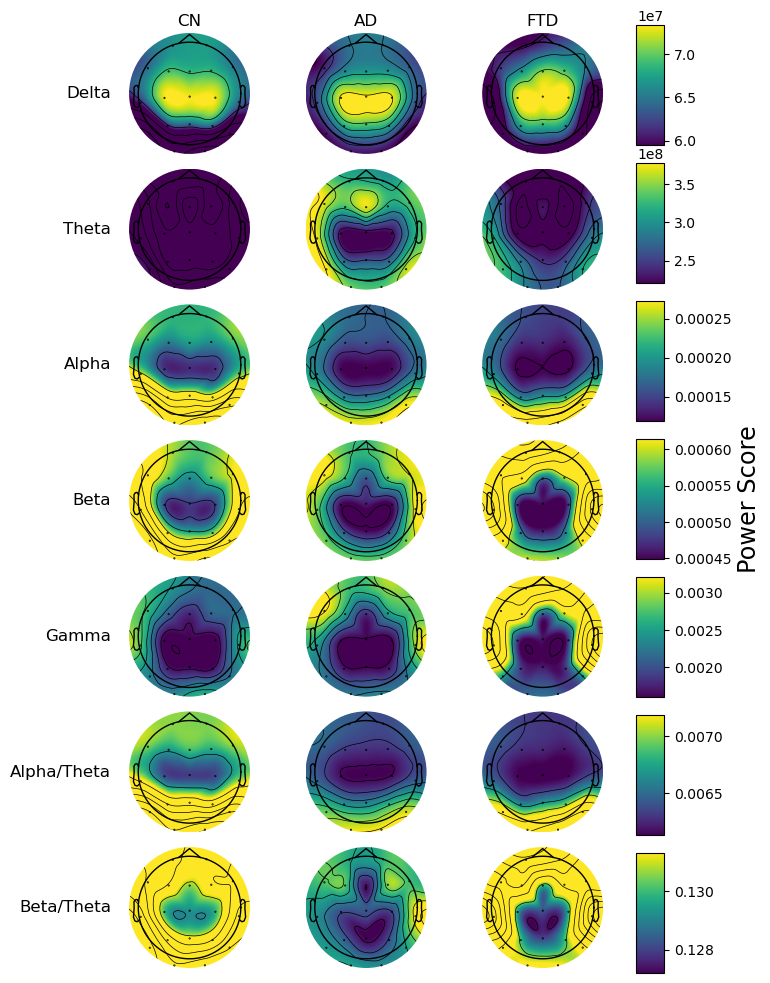

In [259]:
from matplotlib import cm, colors
import matplotlib.pyplot as plt  # Need to import plt for creating subplots
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

avg_bands = np.array([[cn_avg_delta, ad_avg_delta, ftd_avg_delta], [cn_avg_theta, ad_avg_theta, ftd_avg_theta], [cn_avg_alpha, ad_avg_alpha, ftd_avg_alpha], [cn_avg_beta, ad_avg_beta, ftd_avg_beta], [cn_avg_gamma, ad_avg_gamma, ftd_avg_gamma], [cn_avg_alpha_theta, ad_avg_alpha_theta, ftd_avg_alpha_theta], [cn_avg_beta_theta, ad_avg_beta_theta, ftd_avg_beta_theta]])
fig, axs = plt.subplots(nrows=7, ncols=3, figsize=[7, 10])
for i in range(7):
    max_score = avg_bands[i, 1]
    vlim = [np.min(max_score), np.max(max_score)]
    for j in range(3):
            im, cm = plot_topomap(avg_bands[i][j], raw_subj_data_filt.info, axes = axs[i][j], show=False, cmap='viridis', vlim=vlim)
    ax_x_start = 0.95
    ax_x_width = 0.04
    ax_y_start = 0.138*i + 0.01
    ax_y_height = 0.12
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=colors.Normalize(vmin=vlim[0], vmax=vlim[1]))
    sm.set_array(np.linspace(*vlim))
    clb = fig.colorbar(sm, cax=cbar_ax, cmap='viridis')
    if (i==3):
        cbar_ax.yaxis.tick_right()
        cbar_ax.set_ylabel('Power Score', size='xx-large')

cols = ['{}'.format(col) for col in ['CN', 'AD', 'FTD']]
rows = ['{}'.format(row) for row in band_names]


pad = 5 # in points

for ax, col in zip(axs[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.15, top=0.95)
plt.show()


        

In [32]:
label = []
for x in range(65):
    if (x<36):
        label.append(0)
    else:
        label.append(1)
label = np.array(label)
#
# Define PCA for Dimensional Reduction
#
pca    = decomposition.PCA()
# Define a Standard Scaler to normalize inputs
scaler = preprocessing.StandardScaler()
# scaler = preprocessing.QuantileTransformer(output_distribution='normal', n_quantiles=50)

#
#Mach learning 
#
svc = LinearDiscriminantAnalysis()
#svc = svm.SVC(kernel = 'rbf')
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("SVC", svc)])
# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [2, 3, 5, 10, 20],
    #"SVC__C": np.logspace(-4 ,4, 20),
    #"SVC__degree": [2, 3, 5],
    #"SVC__kernel": ['linear', 'poly', 'rbf']
    "SVC__shrinkage"   : np.logspace(-4, 0, 20),
    "SVC__solver"      : ['lsqr','eigen']
            }

#
# Nested Fold
#
NUM_TRIALS=30
nested_scores_lda=[]
nested_scores_linear=[]
nested_scores_rbf=[]
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=i)

    # Nested CV with parameter optimization
    clf = GridSearchCV(pipe, param_grid, n_jobs= -1, scoring='balanced_accuracy', cv=inner_cv)
    nested_score = cross_validate(clf, X=Powers_All[:65, :], y=label, cv=outer_cv, scoring=['accuracy', 'recall', 'precision', 'f1', 'balanced_accuracy'])
    nested_scores_lda.append(nested_score)
    print(i)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


/opt/anaconda3/envs/mne/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2466: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2466: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/sklearn/metrics/_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2466: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2466: UserWarning: y_pred c

15
16
17
18
19
20
21
22
23
24
25


/opt/anaconda3/envs/mne/lib/python3.12/site-packages/sklearn/metrics/_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2466: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/sklearn/metrics/_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/sklearn/metrics/_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to p

26
27
28
29


In [34]:
nested_scores_lda

[{'fit_time': array([1.69454598, 0.46247792, 0.47178388, 0.4817152 , 0.42529488]),
  'score_time': array([0.00251484, 0.00216389, 0.00211692, 0.00211287, 0.00208616]),
  'test_accuracy': array([0.92307692, 0.69230769, 0.61538462, 0.76923077, 0.84615385]),
  'test_recall': array([0.8       , 0.6       , 0.6       , 0.66666667, 0.75      ]),
  'test_precision': array([1. , 0.6, 0.5, 0.8, 1. ]),
  'test_f1': array([0.88888889, 0.6       , 0.54545455, 0.72727273, 0.85714286]),
  'test_balanced_accuracy': array([0.9       , 0.675     , 0.6125    , 0.76190476, 0.875     ])},
 {'fit_time': array([0.56997609, 0.47435689, 0.45419979, 0.45565891, 0.46736002]),
  'score_time': array([0.00226307, 0.00215006, 0.00204325, 0.00219297, 0.00225282]),
  'test_accuracy': array([0.92307692, 0.61538462, 0.84615385, 0.76923077, 0.61538462]),
  'test_recall': array([0.9       , 0.75      , 0.71428571, 0.6       , 0.66666667]),
  'test_precision': array([1.        , 0.42857143, 1.        , 0.75      , 0.33333

In [ ]:
balanced_accuracy = []
precision = []
recall = []
f1 = []
accuracy =[]
for i in range(NUM_TRIALS):
    balanced_accuracy.append(nested_scores[i]['test_balanced_accuracy'])
    precision.append(nested_scores[i]['test_precision'])
    recall.append(nested_scores[i]['test_recall'])
    f1.append(nested_scores[i]['test_f1'])
    accuracy.append(nested_scores[i]['test_accuracy'])

In [339]:
scores = []
scores.append(str(np.array(balanced_accuracy).mean()))
scores.append(str(np.array(precision).mean()))
scores.append(str(np.array(recall).mean()))
scores.append( str(np.array(f1).mean()))
scores.append(str(np.array(accuracy).mean()))


In [353]:
print('balanced:' + scores[0])
print('precision:' + scores[1])
print('recall:' + scores[2])
print('f1:' + scores[3])
print('accuracy:' + scores[4])


balanced:0.6930314592814592
precision:0.6429316979316979
recall:0.6796398508898508
f1:0.6326434225202565
accuracy:0.6837009803921569


In [355]:
nested_scores


[{'fit_time': array([28.33120918, 21.92623806, 11.70899129, 22.48398089]),
  'score_time': array([0.00384498, 0.00271487, 0.00273156, 0.00263691]),
  'test_balanced_accuracy': array([0.4469697 , 0.6875    , 0.69047619, 0.75      ]),
  'test_precision': array([0.25      , 0.66666667, 0.625     , 0.75      ]),
  'test_recall': array([0.16666667, 0.75      , 0.71428571, 0.75      ]),
  'test_f1': array([0.2       , 0.70588235, 0.66666667, 0.75      ]),
  'test_accuracy': array([0.52941176, 0.6875    , 0.6875    , 0.75      ])},
 {'fit_time': array([24.89939618, 17.45960331, 21.86310005, 34.48362708]),
  'score_time': array([0.00265789, 0.00261569, 0.00261116, 0.00267625]),
  'test_balanced_accuracy': array([0.73333333, 0.75      , 0.60909091, 0.79166667]),
  'test_precision': array([0.88888889, 0.7       , 0.5       , 0.44444444]),
  'test_recall': array([0.66666667, 0.875     , 0.4       , 1.        ]),
  'test_f1': array([0.76190476, 0.77777778, 0.44444444, 0.61538462]),
  'test_accurac